<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/advanced-analytics/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este é um exemplo para detecção facial utilizando a biblioteca face recognition (disponível em https://github.com/ageitgey/face_recognition). Primeiro vamos fazer o download de 3 imagens anotadadas. Elas serão a base de dados que conhecemos previamente a identidade das pessoas.

Este exemplo foi adaptado de:
https://levelup.gitconnected.com/face-recognition-system-using-google-colab-ccca1d56f5f3

In [ ]:
!mkdir known
!wget https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg -O known/elon.jpg
!wget https://pbs.twimg.com/profile_images/1564398871996174336/M-hffw5a_400x400.jpg -O known/bill.jpg
!wget https://cdn.britannica.com/99/236599-050-1199AD2C/Mark-Zuckerberg-2019.jpg -O known/mark.jpg


--2022-11-19 18:04:07--  https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 816378 (797K) [image/jpeg]
Saving to: ‘known/elon.jpg’

known/elon.jpg      100%[===================>] 797.24K  --.-KB/s    in 0.03s   

2022-11-19 18:04:08 (28.5 MB/s) - ‘known/elon.jpg’ saved [816378/816378]

--2022-11-19 18:04:08--  https://pbs.twimg.com/profile_images/1564398871996174336/M-hffw5a_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 192.229.237.96, 2a04:4e42:8c::159
Connecting to pbs.twimg.com (pbs.twimg.com)|192.229.237.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24547 (24K) [image/jpeg]
Saving to: ‘known/bill.jpg’

known/bill.jpg      100%[===================>]  23.97K  --.-KB/s    in 

Vamos também fazer o download de imagens sem anotação e setaremos como unknow. Este serão a base de testes.



In [ ]:
!mkdir unknown
!wget https://jpimg.com.br/uploads/2020/09/000_328x62l-750x500.jpg -O unknown/1.jpg
!wget  https://upload.wikimedia.org/wikipedia/commons/a/a0/Bill_Gates_2018.jpg -O unknown/2.jpg
!wget https://portocanal.sapo.pt/uploads/cache/noticia_00314572-580x326.jpg -O unknown/3.jpg

--2022-11-19 18:04:18--  https://jpimg.com.br/uploads/2020/09/000_328x62l-750x500.jpg
Resolving jpimg.com.br (jpimg.com.br)... 172.67.143.140, 104.21.39.54, 2606:4700:3035::6815:2736, ...
Connecting to jpimg.com.br (jpimg.com.br)|172.67.143.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248118 (242K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>] 242.30K   420KB/s    in 0.6s    

2022-11-19 18:04:20 (420 KB/s) - ‘unknown/1.jpg’ saved [248118/248118]

--2022-11-19 18:04:20--  https://upload.wikimedia.org/wikipedia/commons/a/a0/Bill_Gates_2018.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 318220 (311K) [image/jpeg]
Saving to: ‘unknown/2.jpg’

unknown/2.jpg       100%[===================>] 310.76K  --.-KB/s    in 0.00

In [ ]:
!pip3 install face_recognition #Vamos instalar a biblioteca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 27 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=3648224ef03b823b6644ac390352d9d7b92274575ca6ee506c369e4de790db1b
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition   ##Detecting and recogniting faces
import cv2     ## OPENCV
import os       ## para leitura das imagens
from google.colab.patches import cv2_imshow ## para visualizar as imagens processadas


Esta função é usada para pré-processar as imagens, ou seja, para a leitura e rescalonamento das imagens.

In [ ]:
def read_img(path):
   img = cv2.imread(path) ## reading image
   (h,w) = img.shape[:2]  ## fetching height and width
   width = 500            ## hard coding width
   ratio = width / float(w) ## preparing a ration for height
   height = int(h * ratio)  ## generating new height
   return cv2.resize(img,(width,height)) ##return the reshaped image

Vamos carregar nossa base anotada

In [ ]:
known_encodings = [] 
known_names = []
known_dir = 'known' ##Known directory path
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file) ##Reading all the images
  img_enc = face_recognition.face_encodings(img)[0] ##face encodings
  known_encodings.append(img_enc) 
  known_names.append(file.split('.')[0])
print(known_names) ## Printing all the known labels

['bill', 'mark', 'elon']


Vamos agora comparar nossa base anotada com o conjunto de testes. A biblioteca face recognition gera vetores de features paras as imagens
e estes são comparados utilizando similariadade de cossenos.

Processing 1.jpg
[0.68425477 0.81919614 0.40740503]


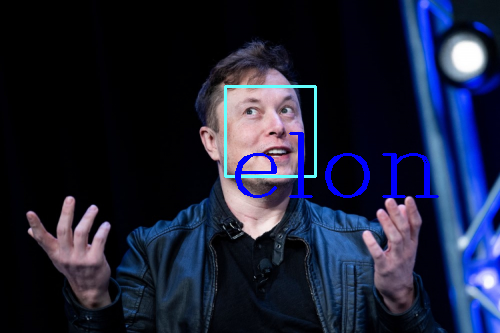

Processing 2.jpg
[0.32646454 0.7695703  0.81799579]


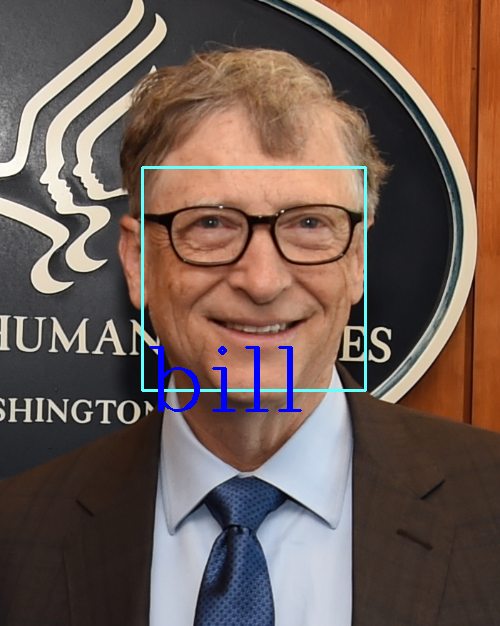

Processing 3.jpg
[0.83107318 0.38700505 0.88219111]


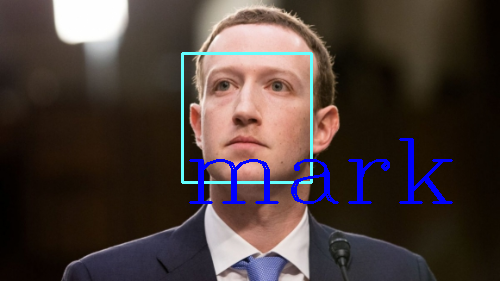

In [ ]:
unknown_dir = 'unknown' 
for file in os.listdir(unknown_dir):
 print("Processing",file)
 img = read_img(unknown_dir + '/' + file)##lendo as imagens
 img_enc = face_recognition.face_encodings(img)[0]##gerando vetores de features
 # a comparação é feita contra todos e as distâncias são salvas
 results = face_recognition.compare_faces(known_encodings,img_enc)
 ##distância de cossenos
 print(face_recognition.face_distance(known_encodings,img_enc))
 ## Printing Face Distances
 res = [i for i, val in enumerate(results) if val]
 name = known_names[res[0]]
 
 '''
Drawing a rectangle box around the faces of unknown images using  face_locations function in library
'''
 (top,right,bottom,left) = face_recognition.face_locations(img)[0]
 cv2.rectangle(img,(left,top),(right,bottom),(255,255,100),2)
 ##Drawing Rectangle
 cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_COMPLEX ,3, (255,0,0),2) ##Putting labels(names) on the rectangle
 cv2_imshow(img) ##showing images